In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [55]:
# Grabbing data from the csv file and telling Pandas that the data already contains an index column.
cd = pd.read_csv("C:/Users/cklni/Desktop/WGU/D212/churn_clean.csv", index_col= [0])

In [56]:
# checking for columns with null values, as I know that each column should have 10,000 non null
cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [57]:
#Selecting the continuous variables
cdc = cd[['Lat', 'Lng', 'Population', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

In [58]:
cdc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lat                   10000 non-null  float64
 1   Lng                   10000 non-null  float64
 2   Population            10000 non-null  int64  
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Outage_sec_perweek    10000 non-null  float64
 6   Email                 10000 non-null  int64  
 7   Contacts              10000 non-null  int64  
 8   Yearly_equip_failure  10000 non-null  int64  
 9   Tenure                10000 non-null  float64
 10  MonthlyCharge         10000 non-null  float64
 11  Bandwidth_GB_Year     10000 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 1015.6 KB


In [59]:
scaler = StandardScaler()

In [60]:
cdc_scaled = scaler.fit_transform(cdc)

In [61]:
cdc_scaled = pd.DataFrame(cdc_scaled, columns = ['Lat', 'Lng', 'Population', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'])

In [62]:
cdc_scaled

,Lat,Lng,Population,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,3.217410,-2.810432,-0.673405,0.720925,-0.398778,-0.679978,-0.666282,-1.005852,0.946658,-1.048746,-0.003943,-1.138487
1,1.024691,0.431644,0.047772,-1.259957,-0.641954,0.570331,-0.005288,-1.005852,0.946658,-1.262001,1.630326,-1.185876
2,1.213570,-2.142079,-0.417238,-0.148730,-1.070885,0.252347,-0.996779,-1.005852,0.946658,-0.709940,-0.295225,-0.612138
3,-1.065031,-1.746273,0.284537,-0.245359,-0.740525,1.650506,0.986203,1.017588,-0.625864,-0.659524,-1.226521,-0.561857
4,-1.724710,-0.331512,0.110549,1.445638,0.009478,-0.623156,1.316700,1.017588,0.946658,-1.242551,-0.528086,-1.428184
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.860078,1.187380,-0.631692,-1.453214,0.564456,-0.196888,-0.005288,1.017588,-0.625864,1.273401,-0.294484,1.427298
9996,-0.402511,0.222073,4.670977,-0.245359,-0.201344,-1.095915,0.986203,1.017588,-0.625864,1.002740,0.811726,1.054194
9997,-0.595385,-0.637349,-0.647906,-0.245359,0.219037,-1.146198,-0.666282,-1.005852,-0.625864,0.487513,-0.061729,0.350984
9998,-0.952234,0.372813,1.788974,-0.680187,-0.820588,0.695616,0.655706,0.005868,-0.625864,1.383018,1.863005,1.407713


In [63]:
#Checking for 0 means and 1 std for standardize data
cdc_scaled.describe().round(2)

,Lat,Lng,Population,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.82,-5.34,-0.68,-1.69,-1.40,-3.33,-3.64,-1.01,-0.63,-1.27,-2.16,-1.48
25%,-0.63,-0.42,-0.62,-0.87,-0.73,-0.67,-0.67,-1.01,-0.63,-1.01,-0.76,-0.99
50%,0.12,0.19,-0.47,-0.00,-0.24,0.01,-0.01,0.01,-0.63,0.03,-0.12,-0.05
75%,0.62,0.71,0.24,0.87,0.48,0.66,0.66,1.02,0.95,1.02,0.65,1.00
max,5.86,1.66,7.07,1.74,7.77,3.77,3.63,6.08,8.81,1.42,2.74,1.72


In [64]:
#Saving scaled data set
cdc_scaled.to_csv("C:/Users/cklni/Desktop/WGU/D212/d212scaledt2.csv", index=False)

In [65]:
# PCA for all principal components

pca = PCA(n_components=12) 
pca.fit(cdc_scaled)
pc = pca.transform(cdc_scaled)
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
pc_labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]
print(pc)

[[-1.61844512e+00 -3.31314031e+00  2.30471171e+00 ...  8.07935465e-02
   6.94540943e-01 -4.54821034e-02]
 [-1.67255201e+00 -6.67850736e-01 -4.73585732e-01 ...  9.57885932e-01
   9.19635185e-01 -4.87011562e-02]
 [-9.60710313e-01 -1.64994373e+00  1.86996072e+00 ... -6.82807090e-02
  -2.48217163e-01  7.98933816e-02]
 ...
 [ 5.90473652e-01 -2.83844491e-01  9.67791047e-01 ... -1.32037668e-03
  -1.02281177e+00 -9.96351451e-02]
 [ 2.04393784e+00  1.99993189e+00 -8.41855620e-01 ...  6.35849874e-01
   6.34322925e-01 -8.07318766e-02]
 [ 1.58154160e+00  9.62095441e-01 -1.13440831e+00 ...  7.99438602e-01
  -1.61539522e-01 -4.59362477e-02]]


In [66]:
pc_df = pd.DataFrame(pc, columns=pc_labels)
print(pc_df)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.618445 -3.313140  2.304712  0.776379  1.222810 -0.569671 -1.361846   
1    -1.672552 -0.667851 -0.473586  0.568088 -0.207263  2.003864 -0.826341   
2    -0.960710 -1.649944  1.869961  0.869657  0.823991  0.689729 -1.463224   
3    -0.921347  0.875175  0.588689  2.239423  0.137624 -0.383608  0.291535   
4    -1.875322  1.565273 -0.127224 -0.520300  0.981036 -1.488779 -0.293338   
...        ...       ...       ...       ...       ...       ...       ...   
9995  1.876471 -0.909059 -0.750864 -0.350075 -1.091801  0.177808  1.413048   
9996  1.457155  3.527778  0.755719  1.232363 -0.019213 -1.200373  0.592358   
9997  0.590474 -0.283844  0.967791 -0.636807 -0.832998 -0.154669 -0.103484   
9998  2.043938  1.999932 -0.841856  1.664691 -0.442105  0.679998 -0.151845   
9999  1.581542  0.962095 -1.134408  1.474866 -1.508081  0.490496 -0.337915   

           PC8       PC9      PC10      PC11      PC12  
0     

In [67]:
# create dataframe of loadings
load = pd.DataFrame(pca.components_.T,
                    columns = pc_labels,
                    index=cdc_scaled.columns)
load

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Lat,-0.023164,-0.714313,0.038587,0.135119,0.030410,-0.095409,-0.030398,0.003805,0.055908,-0.018621,0.674563,0.001076
Lng,0.007723,0.181728,-0.662317,-0.526996,-0.235830,0.167946,-0.010796,-0.141676,-0.061696,-0.048717,0.374615,0.000484
Population,-0.001131,0.653221,0.309929,0.202174,0.141372,-0.017287,0.045437,0.089693,-0.077858,-0.019878,0.632076,0.000034
Age,0.002295,0.050890,-0.212516,-0.170702,0.502793,-0.563570,-0.297992,0.231445,0.087200,-0.448179,-0.036430,0.023016
Income,0.004042,-0.053989,0.135674,-0.332931,0.095984,0.038510,0.793465,0.309402,0.307491,-0.192911,0.006218,-0.001155
Outage_sec_perweek,0.005790,0.009198,-0.293767,0.486784,0.239411,0.493429,0.095408,-0.220067,0.158626,-0.540338,-0.034288,0.000226
Email,-0.020085,0.152642,-0.167834,0.263998,-0.380246,-0.310802,-0.047004,-0.046098,0.786184,0.118718,0.027110,0.000167
Contacts,0.004588,0.029670,-0.298807,0.184810,0.393163,-0.356223,0.437010,-0.467700,-0.144147,0.404432,-0.011014,-0.000503
Yearly_equip_failure,0.017567,-0.006670,0.160009,-0.327178,0.527036,0.374218,-0.275806,-0.173505,0.467708,0.350403,0.038551,-0.000243
Tenure,0.705390,-0.009273,0.023713,-0.007486,-0.015549,-0.032248,-0.006290,-0.036917,0.009349,-0.032837,0.010056,-0.705528


In [68]:
#Variance
pca.explained_variance_ratio_ * 100

array([16.6208669 , 10.28318404,  8.74708578,  8.53942542,  8.46348036,
        8.37993732,  8.32508308,  8.26854103,  8.18483449,  8.01052754,
        6.1276282 ,  0.04940583])

In [69]:
#Total variance
sum(pca.explained_variance_ratio_*100).round(3)

100.0

In [47]:
#Eigenvalues
eigenvalues = pca.explained_variance_
eigen_df = pd.DataFrame(eigenvalues.round(4),
            columns=['Eigenvalues'],
            index = pc_labels)
eigen_df

,Eigenvalues
PC1,1.9947
PC2,1.2341
PC3,1.0498
PC4,1.0248
PC5,1.0157
PC6,1.0057
PC7,0.9991
PC8,0.9923
PC9,0.9823
PC10,0.9614


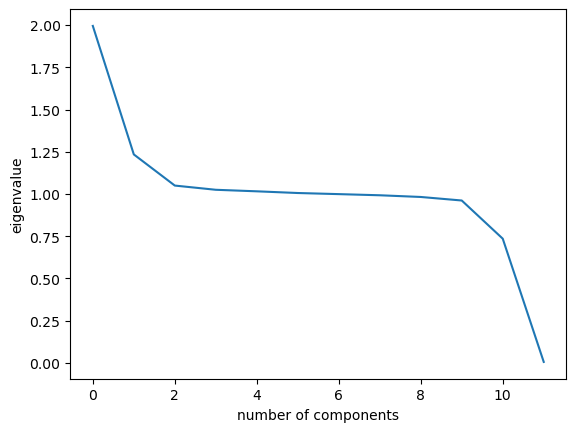

In [48]:
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show() 

In [49]:
# PCA for 6 principal components due to Kaiser criterion

pca = PCA(n_components=6) 
pca.fit(cdc_scaled)
pc = pca.transform(cdc_scaled)
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
pc_labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]
print(pc)

[[-1.61844512 -3.31314031  2.30471171  0.77637901  1.22281025 -0.5696713 ]
 [-1.67255201 -0.66785074 -0.47358573  0.56808782 -0.20726318  2.0038642 ]
 [-0.96071031 -1.64994373  1.86996072  0.86965706  0.82399125  0.68972893]
 ...
 [ 0.59047365 -0.28384449  0.96779105 -0.63680742 -0.83299789 -0.1546691 ]
 [ 2.04393784  1.99993189 -0.84185562  1.66469101 -0.44210529  0.67999775]
 [ 1.5815416   0.96209544 -1.13440831  1.47486608 -1.50808074  0.4904956 ]]


In [50]:
pc_df = pd.DataFrame(pc, columns=pc_labels)
print(pc_df)

           PC1       PC2       PC3       PC4       PC5       PC6
0    -1.618445 -3.313140  2.304712  0.776379  1.222810 -0.569671
1    -1.672552 -0.667851 -0.473586  0.568088 -0.207263  2.003864
2    -0.960710 -1.649944  1.869961  0.869657  0.823991  0.689729
3    -0.921347  0.875175  0.588689  2.239423  0.137624 -0.383608
4    -1.875322  1.565273 -0.127224 -0.520300  0.981036 -1.488779
...        ...       ...       ...       ...       ...       ...
9995  1.876471 -0.909059 -0.750864 -0.350075 -1.091801  0.177808
9996  1.457155  3.527778  0.755719  1.232363 -0.019213 -1.200373
9997  0.590474 -0.283844  0.967791 -0.636807 -0.832998 -0.154669
9998  2.043938  1.999932 -0.841856  1.664691 -0.442105  0.679998
9999  1.581542  0.962095 -1.134408  1.474866 -1.508081  0.490496

[10000 rows x 6 columns]


In [51]:
load = pd.DataFrame(pca.components_.T,columns = pc_labels,
                    index=cdc_scaled.columns)
load

,PC1,PC2,PC3,PC4,PC5,PC6
Lat,-0.023164,-0.714313,0.038587,0.135119,0.030410,-0.095409
Lng,0.007723,0.181728,-0.662317,-0.526996,-0.235830,0.167946
Population,-0.001131,0.653221,0.309929,0.202174,0.141372,-0.017287
Age,0.002295,0.050890,-0.212516,-0.170702,0.502793,-0.563570
Income,0.004042,-0.053989,0.135674,-0.332931,0.095984,0.038510
Outage_sec_perweek,0.005790,0.009198,-0.293767,0.486784,0.239411,0.493429
Email,-0.020085,0.152642,-0.167834,0.263998,-0.380246,-0.310802
Contacts,0.004588,0.029670,-0.298807,0.184810,0.393163,-0.356223
Yearly_equip_failure,0.017567,-0.006670,0.160009,-0.327178,0.527036,0.374218
Tenure,0.705390,-0.009273,0.023713,-0.007486,-0.015549,-0.032248


In [52]:
#Variance
pca.explained_variance_ratio_ * 100

array([16.6208669 , 10.28318404,  8.74708578,  8.53942542,  8.46348036,
        8.37993732])

In [53]:
#Total variance
sum(pca.explained_variance_ratio_*100).round(3)

61.034